In [1]:
# portfolio will have 4 stock NVS, APPL, MSFT, GOOG
# generate 2,000 random portfolios
# calculate Sharpe Ratio, portfolio returns and risk
# visualize using Matplotlib
# find out which is the best portfolio

Port Returns                                                 0.0408972
Port Risk                                                     0.264417
Sharpe Ratio                                                  0.154669
Portfolio Weights    [0.19034626212344838, 0.7618371384017373, 0.01...
Name: 1900, dtype: object
Port Returns                                                -0.0625787
Port Risk                                                     0.115993
Sharpe Ratio                                                 -0.539502
Portfolio Weights    [0.6438982714147183, 0.11634908279466744, 0.07...
Name: 1594, dtype: object


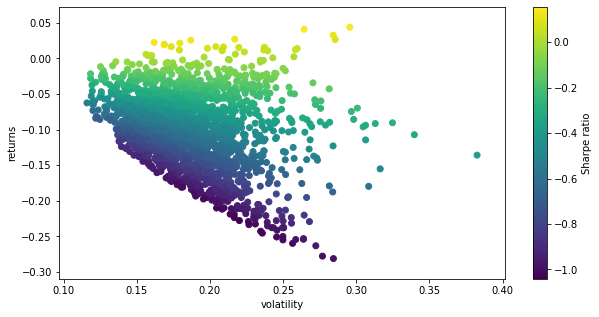

In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Variables
stocks = ['NVS','AAPL','MSFT','GOOG']

companies = {}

#Get all prices into a dataframe
for stock in stocks:
    prices = requests.get(f'https://financialmodelingprep.com/api/v3/historical-price-full/{stock}?serietype=line&apikey=ef33f986ddc025621ccdb3f676503a41').json()
    prices = prices['historical'][-900:]
    prices = pd.DataFrame(prices)
    
    companies[stock] = prices.set_index('date')
    companies[stock] = companies[stock]['close']

portfolio = pd.concat(companies, axis=1)
returns_portfolio = portfolio.pct_change()

number_of_portfolios = 2000
RF = 0

portfolio_returns = []
portfolio_risk = []
sharpe_ratio_port = []
portfolio_weights = []

for portfolio in range(number_of_portfolios):
    weights = np.random.random_sample((len(stocks)))
    weights = weights/np.sum(weights)
    
    annualize_return = np.sum((returns_portfolio.mean()*weights)*252)
    portfolio_returns.append(annualize_return)

    #variance
    matrix_covariance = (returns_portfolio.cov())*252
    portfolio_variance = np.dot(weights.T,np.dot(matrix_covariance, weights))
    portfolio_standard_deviation= np.sqrt(portfolio_variance) 
    portfolio_risk.append(portfolio_standard_deviation)
    
    #sharpe_ratio
    sharpe_ratio = ((annualize_return-RF)/portfolio_standard_deviation)
    sharpe_ratio_port.append(sharpe_ratio)

    portfolio_weights.append(weights)

portfolio_risk = np.array(portfolio_risk)
portfolio_returns = np.array(portfolio_returns)
sharpe_ratio_port = np.array(sharpe_ratio_port)

plt.figure(figsize=(10, 5))
plt.scatter(portfolio_risk, portfolio_returns, c=portfolio_returns / portfolio_risk) 
plt.xlabel('volatility')
plt.ylabel('returns')
plt.colorbar(label='Sharpe ratio')

porfolio_metrics = [portfolio_returns,portfolio_risk,sharpe_ratio_port, portfolio_weights] 

portfolio_dfs = pd.DataFrame(porfolio_metrics)
portfolio_dfs = portfolio_dfs.T
portfolio_dfs.columns = ['Port Returns','Port Risk','Sharpe Ratio','Portfolio Weights']

#convert from object to float the first three columns.
for col in ['Port Returns', 'Port Risk', 'Sharpe Ratio']:
    portfolio_dfs[col] = portfolio_dfs[col].astype(float)
    
#portfolio with the highest Sharpe Ratio
Highest_sharpe_port = portfolio_dfs.iloc[portfolio_dfs['Sharpe Ratio'].idxmax()]

#portfolio with the minimum risk 
min_risk = portfolio_dfs.iloc[portfolio_dfs['Port Risk'].idxmin()]

#Highest_sharpe_port
print(Highest_sharpe_port)
print(min_risk)